In [1]:
import logging
from gw_scanner import GravWaveScanner
from gw_multi_process import MultiGwProcessor
from astropy.time import Time
import numpy as np

In [2]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
print(logger)

<Logger __main__ (DEBUG)>


In [3]:
# Look for transients first detected within 72 hours of merger
n_days = 3.0

GravWaveScanner can be initialised with optional arguments *gw_name* and *rev*. By default, it loads the most recent LIGO public event, and the most recent revision. Alternatively, a fits file can be saved to the LIGO_skymaps directory, and its name specified with *gw_file*.

In [4]:
gw = MultiGwProcessor(gw_name="S191213g", logger=logger, n_days=n_days, prob_threshold=0.9)

Running on 3 CPUs
Found voevent S191213g-4-Update.xml
Latest skymap URL: https://gracedb.ligo.org/api/superevents/S191213g/files/LALInference.fits.gz
Saving to: /Users/robertstein/Code/ZTF_ToO_toolkit/LIGO_skymaps/S191213g_4_LALInference.fits.gz


INFO:root:MERGER TIME: 2019-12-13T04:34:08.139
INFO:root:Reading map


Reading file: /Users/robertstein/Code/ZTF_ToO_toolkit/LIGO_skymaps/S191213g_4_LALInference.fits.gz
Threshold found! 
 To reach 90.00004832275556% of probability, pixels with probability greater than 4.959445251787793e-07 are included
Threshold found! 
 To reach 90.00004832275556% of probability, pixels with probability greater than 4.959445251787793e-07 are included


  4%|▎         | 111744/3145728 [00:00<00:02, 1117374.46it/s]

Checking which pixels are within the contour:


100%|██████████| 3145728/3145728 [00:04<00:00, 773074.26it/s] 
INFO:__main__:using mongo client at 127.0.0.1:27018


Total pixel area: 4478.470890846786 degrees


INFO:__main__:connected to collection srcs of database PS1_DR1.
INFO:__main__:found 1919106885 documents in source collection srcs.
INFO:__main__:set HEALPIX partition of order 14 with key 'hpxid_14'. Nested: True, Indexed: True, Resolution ["]: 12.883
INFO:__main__:no 2d sphere key found in catalog PS1_DR1
INFO:__main__:source collection has the following indexes: _id, hpxid_14
INFO:__main__:setting default search method to 'healpix'
INFO:__main__:Using MIN_NDET=1
INFO:__main__:Using MIN_TSPAN=-1.0
INFO:__main__:Using MAX_TSPAN=365.0
INFO:__main__:Using MIN_RB=0.3
INFO:__main__:Using MAX_FWHM=5.5
INFO:__main__:Using MAX_ELONG=1.4
INFO:__main__:Using MAX_MAGDIFF=1.0
INFO:__main__:Using MAX_NBAD=2
INFO:__main__:Using MIN_DIST_TO_SSO=20.0
INFO:__main__:Using MIN_GAL_LAT=0.0
INFO:__main__:Using GAIA_RS=10.0
INFO:__main__:Using GAIA_PM_SIGNIF=3.0
INFO:__main__:Using GAIA_PLX_SIGNIF=3.0
INFO:__main__:Using GAIA_VETO_GMAG_MIN=9.0
INFO:__main__:Using GAIA_VETO_GMAG_MAX=20.0
INFO:__main__:Usin

Scanning method: time 
 N_sky: 34.68600814125966


In [5]:
# print(gw.get_multi_night_summary(3).data.to_csv())

In [6]:
# fig = gw.plot_skymap()

In [7]:
# gw.fill_queue()
# gw.terminate()
# gw.combine_cache()
# gw.clean_cache()

  0%|          | 0/4 [00:00<?, ?it/s]

Using 4 Nightly Summaries between 20191213 and 20191216


100%|██████████| 4/4 [00:07<00:00,  1.89s/it]


Of these, 0 nights are missing because ZTF did not observe.


  0%|          | 1/1520 [00:00<02:35,  9.75it/s]

Unpacking observations


100%|██████████| 341504/341504 [00:00<00:00, 860884.05it/s]


Observations started at 2458830.690454861
103878 pixels were covered, covering approximately 1362.2522699569622 sq deg.
85346 pixels were covered at least twice, covering approximately 1119.2243038155038 sq deg.
In total, 27.50 % of the contour was observed at least once. 
 In total, 25.10 % of the contour was observed at least twice. 
This estimate accounts for chip gaps.


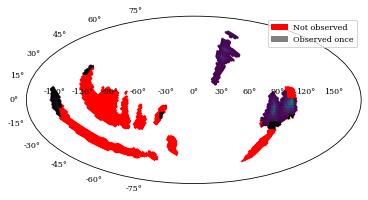

In [8]:
fig, message = gw.plot_overlap_with_observations(first_det_window_days=n_days)
print(message)

In [9]:
print(gw.overlap_fields)

['1738', '1779', '1815', '1842', '1843', '1844', '1866', '1867', '256', '257', '258', '304', '305', '306', '307', '308', '309', '355', '356', '357', '358', '359', '360', '374', '407', '408', '409', '410', '411', '425', '426', '458', '459', '460', '476', '477', '478', '527', '528', '552', '553', '554', '603', '604', '631', '651', '652', '653', '678', '697', '698', '699', '700', '739', '740', '741', '742', '776', '777', '778', '809', '810', '811', '812', '837', '838']


In [10]:
gw.export_fields()

field pid UT_START lim_mag exp
1867 3 2019-12-13T04:34:15.3 20.5 30
1844 2 2019-12-13T04:34:55.5 20.5 30
1844 3 2019-12-13T04:35:34.6 20.5 30
837 1 2019-12-13T04:36:13.9 20.5 30
1866 2 2019-12-13T04:36:52.8 20.5 30
810 1 2019-12-13T04:37:34.9 20.5 30
1842 2 2019-12-13T04:38:14.1 20.5 30
1842 3 2019-12-13T04:38:53.1 20.5 30
809 1 2019-12-13T04:39:32.5 20.5 30
603 1 2019-12-13T04:52:15.6 20.5 30
552 1 2019-12-13T04:52:55.5 20.5 30
553 1 2019-12-13T04:53:34.7 20.5 30
604 1 2019-12-13T04:54:14.8 20.5 30
554 1 2019-12-13T04:55:36.0 20.5 30
410 1 2019-12-13T05:25:01.9 20.5 30
409 1 2019-12-13T05:25:41.2 20.5 30
458 1 2019-12-13T05:26:22.4 20.5 30
408 1 2019-12-13T05:27:01.6 20.5 30
357 1 2019-12-13T05:27:40.7 20.5 30
306 1 2019-12-13T05:28:19.9 20.5 30
356 1 2019-12-13T05:28:59.0 20.5 30
305 1 2019-12-13T05:29:38.2 20.5 30
355 1 2019-12-13T05:30:17.2 20.5 30
553 1 2019-12-13T05:34:01.6 20.5 30
604 1 2019-12-13T05:35:24.4 20.5 30
603 1 2019-12-13T05:36:04.0 20.5 30
653 1 2019-12-13T05:36:47.8

In [11]:
def check_pixels(gw):
    print(gw.overlap_fields)
    for f in gw.overlap_fields:
        mask = np.array([x == f for x in gw.mns.data["field"]])
        data = gw.mns.data[mask]
        obs_times = np.array([Time(data["UT_START"].iat[i], format="isot", scale="utc").jd
                              for i in range(len(data))])
        if (max(obs_times) - min(obs_times)) > 0.00:
#         if len(obs_times) > 1:
            print(f, np.sum(mask), max(obs_times) - min(obs_times))
        else:
            print(f, obs_times)

check_pixels(gw)

['1738', '1779', '1815', '1842', '1843', '1844', '1866', '1867', '256', '257', '258', '304', '305', '306', '307', '308', '309', '355', '356', '357', '358', '359', '360', '374', '407', '408', '409', '410', '411', '425', '426', '458', '459', '460', '476', '477', '478', '527', '528', '552', '553', '554', '603', '604', '631', '651', '652', '653', '678', '697', '698', '699', '700', '739', '740', '741', '742', '776', '777', '778', '809', '810', '811', '812', '837', '838']
1738 2 0.07434375025331974
1779 2 0.07433796301484108
1815 2 0.0004502316005527973
1842 4 1.0410335650667548
1843 2 0.0004502316005527973
1844 2 0.0004525464028120041
1866 [2458830.69227778]
1867 3 0.10954629629850388
256 2 0.07680439809337258
257 [2458831.85728704]
258 [2458831.91544676]
304 [2458830.77223727]
305 4 1.1305833333171904
306 5 3.1406087963841856
307 3 2.09866087930277
308 3 2.1058310181833804
309 2 1.9762222222052515
355 5 3.0931319440715015
356 6 3.0981157408095896
357 5 3.1054513887502253
358 3 2.0994918984

In [12]:
# print(gw.simple_plot_overlap_with_observations(first_det_window_days=n_days))

In [13]:
# print(gw.overlap_fields)

In [14]:
# print(gw.mns.data)

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
# from astropy.time import Time
# import pandas as pd
# from tqdm import tqdm
# import healpy as hp
# import matplotlib.patches as mpatches
# from gwemopt.ztf_tiling import get_quadrant_ipix


# def plot_overlap_with_observations(gw, fields=None, pid=None, first_det_window_days=None):
#     fig = plt.figure()
#     plt.subplot(projection="aitoff")

#     probs = []
#     single_probs = []

#     if fields is None:
#         mns = gw.get_multi_night_summary(first_det_window_days)

#     else:

#         class MNS:
#             def __init__(self, data):
#                 gw.data = pandas.DataFrame(data, columns=["field", "ra", "dec", "UT_START"])

#         data = []

#         for f in fields:
#             ra, dec = ztfquery_fields.field_to_coords(f)[0]
#             t = Time(Time.now().jd + 1., format="jd").utc
#             t.format = "isot"
#             t = t.value
#             for _ in range(2):
#                 data.append([f, ra, dec, t])

#         mns = MNS(data)
        
#     data = mns.data.copy()   
    
#     if pid is not None:
#         pid_mask = data["pid"] == str(pid)
#         data = data[pid_mask]
        
#     obs_times = np.array([Time(data["UT_START"].iat[i], format="isot", scale="utc")
#                           for i in range(len(data))])
    
#     if first_det_window_days is not None:
#         first_det_mask = [x < Time(gw.t_min.jd + first_det_window_days, format="jd").utc for x in obs_times]
#         data = data[first_det_mask]
#         obs_times = obs_times[first_det_mask]
    
#     pix_obs_times = dict()
    
#     print("Unpacking observations")
    
#     for i, obs_time in enumerate(tqdm(obs_times)):
#         pix = get_quadrant_ipix(gw.ligo_nside, data["ra"].iat[i], data["dec"].iat[i])
        
#         flat_pix = []
        
#         for sub_list in pix:
#             for p in sub_list:
#                 flat_pix.append(p)
                
#         flat_pix = list(set(flat_pix))
        
#         t = obs_time.jd
#         for p in flat_pix:
#             if p not in pix_obs_times.keys():
#                 pix_obs_times[p] = [t]
#             else:
#                 pix_obs_times[p] += [t]
                
#     plot_pixels = []
#     probs = []
#     single_pixels = []
#     single_probs = []
#     veto_pixels = []
    
#     print("Checking skymap")
    
#     # hp.nest2ring(gw.ligo_nside, 
    
#     for i, p in enumerate(tqdm(hp.nest2ring(gw.ligo_nside, gw.pixel_nos))):
        
#         if p in pix_obs_times.keys():
            
#             obs = pix_obs_times[p]
            
#             if max(obs) - min(obs) > 0.01:
#                 plot_pixels.append(p)
#                 probs.append(gw.map_probs[i])
#             else:
#                 single_pixels.append(p)
#                 single_probs.append(gw.map_probs[i])
#         else:
#             veto_pixels.append(p)
    
#     overlap_prob = np.sum(probs) * 100.
    
#     size = hp.max_pixrad(gw.ligo_nside)**2 * 50.
    
#     print(size, gw.ligo_nside)
    
#     veto_pos = np.array([hp.pixelfunc.pix2ang(gw.ligo_nside, i, lonlat=True) for i in veto_pixels]).T

#     plt.scatter(gw.wrap_around_180(np.radians(veto_pos[0])), np.radians(veto_pos[1]),
#                 color="red", s=size)
    
#     single_pos = np.array([hp.pixelfunc.pix2ang(gw.ligo_nside, i, lonlat=True) for i in single_pixels]).T

#     plt.scatter(gw.wrap_around_180(np.radians(single_pos[0])), np.radians(single_pos[1]),
#                 c=single_probs, vmin=0., vmax=max(gw.data[gw.key]), s=size, cmap='gray')
    
#     plot_pos = np.array([hp.pixelfunc.pix2ang(gw.ligo_nside, i, lonlat=True) for i in plot_pixels]).T
    
#     if len(plot_pos) > 0:
    
#         plt.scatter(gw.wrap_around_180(np.radians(plot_pos[0])), np.radians(plot_pos[1]),
#                     c=probs, vmin=0., vmax=max(gw.data[gw.key]), s=size)

#     red_patch = mpatches.Patch(color='red', label='Not observed')
#     gray_patch = mpatches.Patch(color='gray', label='Observed once')
#     plt.legend(handles=[red_patch, gray_patch])

#     message = "In total, {0} % of the LIGO contour was observed at least once. \n " \
#               "In total, {1} % of the LIGO contour was observed at least twice. \n" \
#               "This estimate accounts for chip gaps.".format(
#         100 * (np.sum(probs) + np.sum(single_probs)), overlap_prob)

#     print(message)
    
#     all_pix = single_pixels + plot_pixels
    
#     n_pixels = len(single_pixels + plot_pixels)
    
#     area = hp.pixelfunc.nside2pixarea(gw.ligo_nside, degrees=True) * n_pixels

# #     area = (2. * base_ztf_rad)**2 * float(len(overlapping_fields))
# #     n_fields = len(overlapping_fields)

#     print("{0} pixels were covered, covering approximately {1} sq deg.".format(
#         n_pixels, area))
#     return fig, message
# plot_overlap_with_observations(gw, pid=1, first_det_window_days=2.0)

In [16]:
# (fig, message) = gw.plot_overlap_with_observations()

In [17]:
# res = gw.get_avro_by_name("ZTF19acbpole")

In [18]:
# def get_lightcurve(ztf_res):
#     lc = []
#     for x in [ztf_res] + [ztf_res]["prv_candidates"]:
#         print(x[""])
    
# get_lightcurve(res)

In [19]:
# import numpy as np
# from astropy.time import Time

# mns = gw.get_multi_night_summary()
# obs_times = np.array([Time(mns.data["UT_START"].iat[i], format="isot", scale="utc")
#                       for i in range(len(mns.data)) if mns.data["field"].iat[i]])

In [20]:
# fig = gw.plot_ztf_observations()

In [21]:
# print(gw.draft_gcn())

In [22]:
# import numpy as np

# name = "ZTF20aaerqjd"

# res = gw.get_avro_by_name(name)

# print(gw.filter_f_no_prv(res), gw.filter_f_history(res))

# print(gw.check_ampel_filter(name))

# # Veto old transients
# if res["candidate"]["jdstarthist"] < gw.t_min.jd:
#     print("Time")

# # Require 2 detections separated by 15 mins
# if (res["candidate"]["jdendhist"] - res["candidate"]["jdstarthist"]) < 0.01:
#     print("Delta t")

# # Require 2 positive detections
# old_detections = [x for x in res["prv_candidates"] if np.logical_and(
#     x["isdiffpos"] is not None,
#     np.logical_and(x["jd"] > gw.t_min.jd, x["jd"] < gw.default_t_max.jd))]

# # print(res["prv_candidates"])

# pos_detections = [x for x in old_detections if x['isdiffpos'] in ["t", "1"]]

# if len(pos_detections) < 1:
#     print("Pos")


In [23]:
# res = gw.get_avro_by_name("ZTF19abygvmp")
# # print(res)
# gw.cache[res["objectId"]] = res

In [24]:
# gw.add_to_cache_by_names("ZTF19acbpauu", "ZTF19acbpdbs", "ZTF19acbpjbq", "ZTF19acbpkob", "ZTF19acbpmzs", "ZTF19acbpole", "ZTF19acbpqki", "ZTF19acbpqlh", "ZTF19acbpqvc", "ZTF19acbprgt", "ZTF19acbpsuf", "ZTF19acbpthm", "ZTF19acbpvix", "ZTF19acbqift", "ZTF19acbqrsk", "ZTF19acbqvya", "ZTF19acbqvyc", "ZTF19acbqyjb", "ZTF19acbqyjc", "ZTF19acbqzvu", "ZTF19acbqzzk", "ZTF19acbrhzw", "ZTF19acbrhzw", "ZTF19acbugyi", "ZTF19acbvcos", "ZTF19acbveok", "ZTF19acbvgdu", "ZTF19acbvisk", "ZTF19acbvkbi", "ZTF19acbvlqa", "ZTF19acbvlrl", "ZTF19acbvlry")
# gw.cache = dict()
# gw.add_to_cache_by_names("ZTF19acbpsuf", "ZTF19acbpqlh", "ZTF19acbvisk", "ZTF19acbvkbi", "ZTF19acbwaah")
# print(gw.draft_gcn())
# print(gw.text_summary())

In [25]:
# import numpy as np



# def tns_summary(g):
    
#     for name, res in sorted(g.cache.items()):
#         detections = [x for x in res["prv_candidates"] + [res["candidate"]] if x["isdiffpos"] is not None]
#         detection_jds = [x["jd"] for x in detections]
#         first_detection = detections[detection_jds.index(min(detection_jds))]
#         latest = [x for x in res["prv_candidates"] + [res["candidate"]] if x["isdiffpos"] is not None][-1]
#         try:
#             last_upper_limit = [x for x in res["prv_candidates"] if np.logical_and(x["isdiffpos"] is None, x["jd"] < first_detection["jd"])][-1]
#         except:
#             last_upper_limit = {"jd": res["candidate"]["jdendref"], "fid": 1, "diffmaglim": np.nan}
#             print(res["candidate"].keys())
#         print("Candidate:", name, res["candidate"]["ra"], res["candidate"]["dec"], first_detection["jd"])
#         print("Last Upper Limit:", last_upper_limit["jd"], parse_ztf_filter(last_upper_limit["fid"]), last_upper_limit["diffmaglim"])
#         print("First Detection:", first_detection["jd"], parse_ztf_filter(first_detection["fid"]), first_detection["magpsf"], first_detection["sigmapsf"])
#         print("First observed {0} hours after merger".format(24. * (first_detection["jd"]-g.t_min.jd)))
#         print("It has risen", -latest["magpsf"] + last_upper_limit["diffmaglim"], parse_ztf_filter(latest["fid"]), parse_ztf_filter(last_upper_limit["fid"]))
#         print([x["jd"] for x in res["prv_candidates"] + [res["candidate"]] if x["isdiffpos"] is not None])
#         print("\n")        
        
        
# tns_summary(gw)

Alternative methods for starting the GW scanner:

In [26]:
# gw = GravWaveScanner(logger=logger) # Grab most recent
# gw = GravWaveScanner("S190814bv", prob_threshold=0.99, logger=logger) # Grab most recent revision of "S190814bv" up to 99%
# gw = GravWaveScanner(gw_file="https://wiki.gw-astronomy.org/pub/OpenLVEM/FermiGBM-LVC/GBM-190816-with-LV-v2.fits", prob_threshold=0.9, logger=logger) # Use manual file